In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path
import math
%matplotlib inline

%cd ..
# Check the current working directory
print("Current Working Directory:", Path.cwd())

# Adjust the relative path based on your project structure
filepath = Path("data/raw/train.csv")
filepath_test = Path("data/raw/test.csv")

# Read the CSV file
df = pd.read_csv(filepath)


df_test = pd.read_csv(filepath_test)

# Display the first few rows of the DataFrame
df_test.head()


/Users/siddhant/nycproj/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/siddhant/nycproj/nyctaxitrip
Current Working Directory: /Users/siddhant/nycproj/nyctaxitrip


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [3]:
import warnings

warnings.filterwarnings("ignore")


In [4]:
df = df.astype({"pickup_datetime":"datetime64[ns]", "dropoff_datetime":"datetime64[ns]"})
df_test = df_test.astype({"pickup_datetime":"datetime64[ns]"})

In [5]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


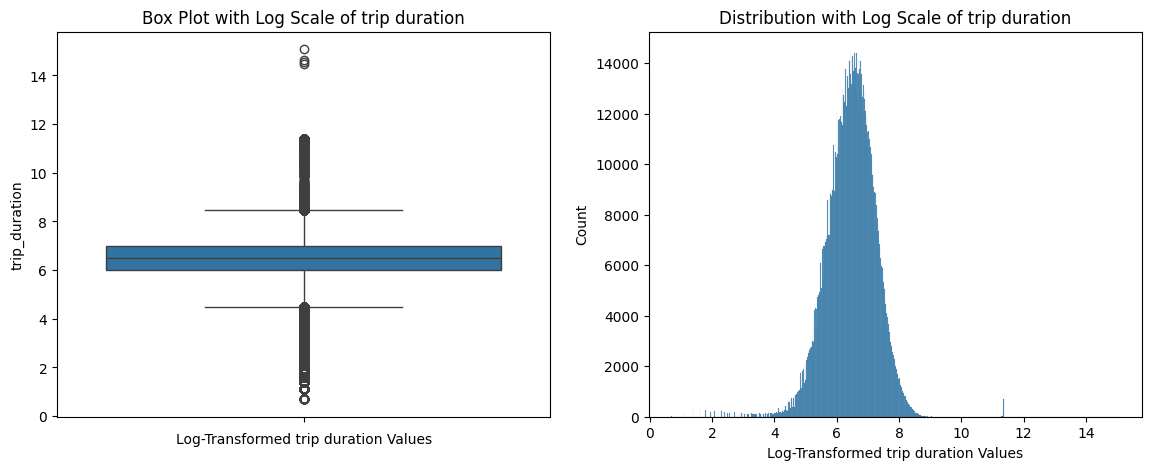

In [6]:
# LOG NORMAL DISTRIBUTION OF TARGET VARIABLE

fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(np.log1p(df['trip_duration']), ax=ax[0])
ax[0].set_xlabel('Log-Transformed trip duration Values')
ax[0].set_title('Box Plot with Log Scale of trip duration')


sns.histplot(np.log1p(df["trip_duration"]), ax=ax[1]) 
ax[1].set_xlabel('Log-Transformed trip duration Values')
ax[1].set_title('Distribution with Log Scale of trip duration')


plt.show()


In [7]:
df["vendor_id"].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

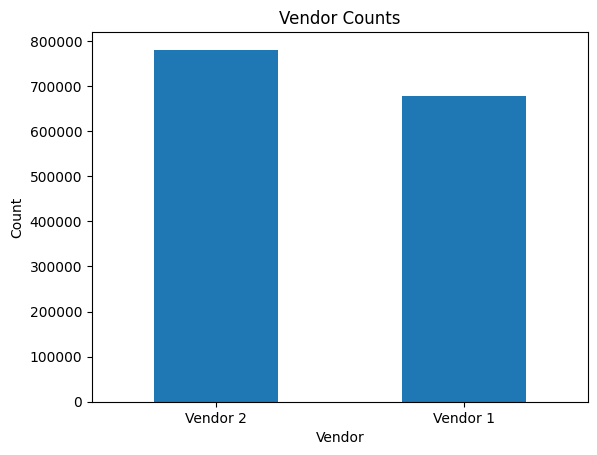

In [8]:
# NUMBER OF RIDES FOR EACH VENDOR
vendor_count = df["vendor_id"].value_counts()
vendor_count = vendor_count.rename({1:"Vendor 1", 2:"Vendor 2"})

vendor_count.plot(kind='bar', rot=0, xlabel='Vendor', ylabel='Count', title='Vendor Counts')

plt.show()

In [9]:
# CONVERTING LATITUDE AND LONGITUDE TO NUMERIC 
df = df.astype({'pickup_longitude': 'int64', 'pickup_latitude': 'int64', 'dropoff_longitude': 'int64', 'dropoff_latitude': 'int64'})
df_test = df_test.astype({'pickup_longitude': 'int64', 'pickup_latitude': 'int64', 'dropoff_longitude': 'int64', 'dropoff_latitude': 'int64'})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  int64         
 5   pickup_latitude     625134 non-null  int64         
 6   dropoff_longitude   625134 non-null  int64         
 7   dropoff_latitude    625134 non-null  int64         
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 42.9+ MB


In [10]:
# CREATING A COPY OF MAIN DATAFRAME AS TO KEP ORIGNAL DATA HANDY
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  int64         
 6   pickup_latitude     1458644 non-null  int64         
 7   dropoff_longitude   1458644 non-null  int64         
 8   dropoff_latitude    1458644 non-null  int64         
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 122.4+ MB


In [11]:
# CREATING NEW FEATURES
def new_features(dataframe, date1):
    
    
    dataframe["Month"] = dataframe[date1].dt.month
    dataframe["Pickup Day"] = dataframe[date1].dt.dayofweek
    dataframe["Pickup hours"] = dataframe[date1].dt.hour
    dataframe["Pickup mins"] = dataframe[date1].dt.minute
    
    # Converting trip journey from seconds to minutes
    # dataframe["journey_mins"] = dataframe[y] / 60
    
    return dataframe.head()

# Assuming 'df1' is your DataFrame and 'pickup_datetime' is the column with date and time information
new_features(df1, 'pickup_datetime')


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Month,Pickup Day,Pickup hours,Pickup mins
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73,40,-73,40,N,455,3,0,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73,40,-73,40,N,663,6,6,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73,40,-74,40,N,2124,1,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,40,-74,40,N,429,4,2,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73,40,-73,40,N,435,3,5,13,30


In [12]:
# CALCULATING THE DISTANCES OF TRIPS FROM THE LATITUDES AND LONGITUDES
# from geopy.distance import great_circle
from math import radians, sin, cos, sqrt, atan2

def distances(row):
    r = 6371
    
    lon1 = radians(row["pickup_longitude"])
    lat1 = radians(row["pickup_latitude"])
    lon2 = radians(row["dropoff_longitude"])
    lat2 = radians(row["dropoff_latitude"])
    
    diff_lon = lon2 - lon1
    diff_lat = lat2 - lat1
    

    a = sin(diff_lat/2) ** 2 + cos(lat1) * cos(lat2) * sin(diff_lon/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    Distance = r * c 
    
    return Distance

df1["haversine_distance"] = df1.apply(distances, axis=1)
df1["journey_mins"] = df1["trip_duration"]/60
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Month,Pickup Day,Pickup hours,Pickup mins,haversine_distance,journey_mins
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73,40,-73,40,N,455,3,0,17,24,0.000000,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73,40,-73,40,N,663,6,6,0,43,0.000000,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73,40,-74,40,N,2124,1,1,11,35,85.179809,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,40,-74,40,N,429,4,2,19,32,0.000000,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73,40,-73,40,N,435,3,5,13,30,0.000000,7.250000


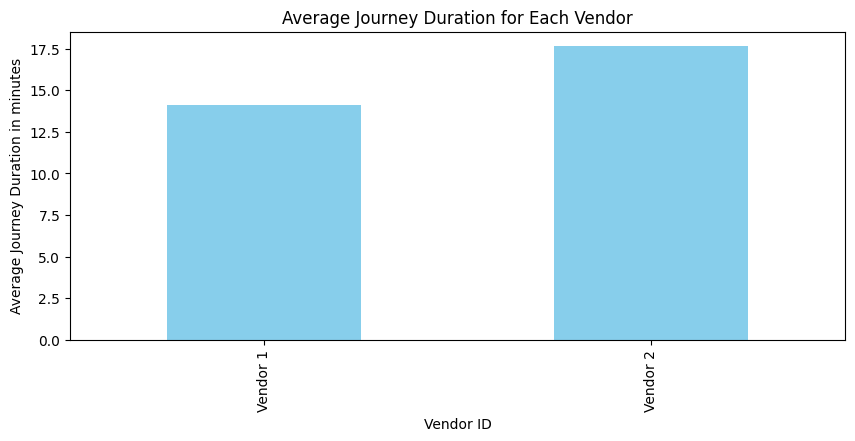

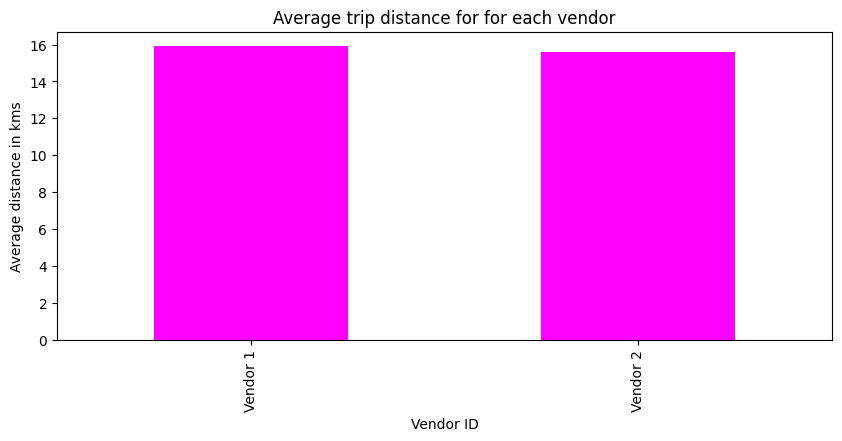

In [25]:
# FINDING AVERAGE TRIP DURATION FOR EACH VENDOR
grouped_vendor = df1.groupby("vendor_id")["journey_mins"].mean()
grouped_vendor1 = df1.groupby("vendor_id")["haversine_distance"].mean()

# Create the first plot for Average Journey Duration
fig, ax1 = plt.subplots(figsize=(10, 4))
grouped_vendor.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_xlabel("Vendor ID")
ax1.set_ylabel("Average Journey Duration in minutes")
ax1.set_title("Average Journey Duration for Each Vendor")
ax1.set_xticklabels([f"Vendor {vendor_id}" for vendor_id in grouped_vendor.index])

# Create the second plot for Average trip distance
fig, ax2 = plt.subplots(figsize=(10, 4))
grouped_vendor1.plot(kind='bar', ax=ax2, color='magenta')
ax2.set_xlabel("Vendor ID")
ax2.set_ylabel("Average distance in kms")
ax2.set_title("Average trip distance for for each vendor")
ax2.set_xticklabels([f"Vendor {vendor_id}" for vendor_id in grouped_vendor.index])

# Show the plots
plt.show()




1. From the first graph we see that there a good difference in the average duration for journey's between two vendors. The average journey duration for vendor 2 is 16 minutes which is higher than the average journey duration of vendor 1 which is approximately 13 minutes.

2. The graph 2 compares average trip distance for each vendor and we see that the difference between both teh vendors is veruy negligible.

In [ ]:
outliers = df1[["journey_mins"]]

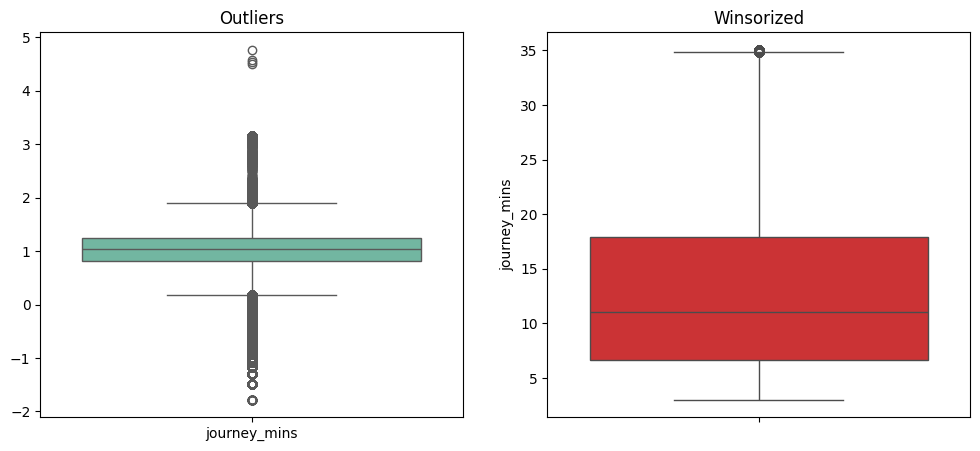

In [ ]:
# DEALING WITH OUTLIERS IN TARGET COLUMN
def winsorizer(df, col, up_lim, low_lim):
    upper = np.percentile(df[col], up_lim)
    lower = np.percentile(df[col], low_lim)
    
    df[col] = np.where(df[col] > upper, upper, 
                       np.where(df[col] < lower, lower, df[col]))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(data=np.log10(outliers), fill=True, ax=ax[0],palette="Set2")
    ax[0].set_title("Outliers")
    
    sns.boxplot(data=df[col], fill=True, ax=ax[1], palette="Set1")
    ax[1].set_title("Winsorized")
    
    plt.show()

winsorizer(df1, "journey_mins", 95, 5)



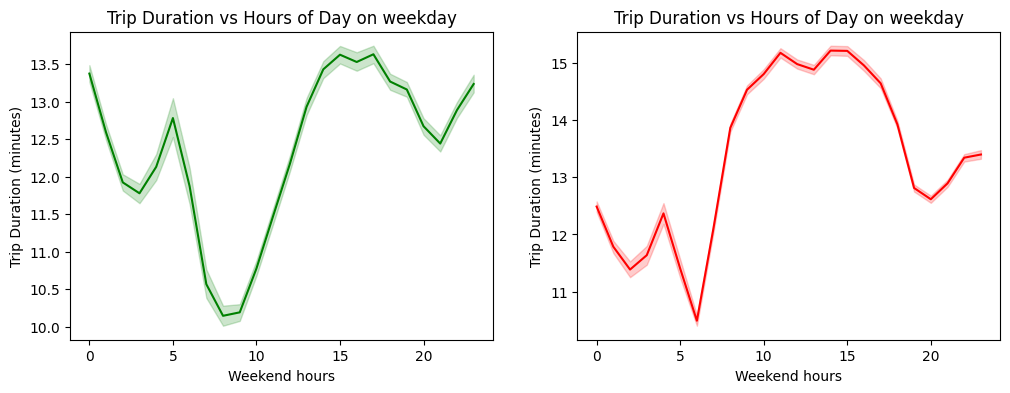

In [ ]:
# IDENTIFYING THE BUSSIEST HOURS OF THE DAY
weekend = df1[df1["Pickup Day"].isin([5,6])]
weekday = df1[df1["Pickup Day"].isin([0,1,2,3,4])]

fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(x=weekend["Pickup hours"], y=weekend["journey_mins"], ax=ax[0], color = "green")
ax[0].set_xlabel("Weekend hours")
ax[0].set_ylabel("Trip Duration (minutes)")
ax[0].set_title("Trip Duration vs Hours of Day on weekday")

sns.lineplot(x=weekday["Pickup hours"], y=weekday["journey_mins"], ax=ax[1], color = "red")
ax[1].set_xlabel("Weekend hours")
ax[1].set_ylabel("Trip Duration (minutes)")
ax[1].set_title("Trip Duration vs Hours of Day on weekday")
plt.show()

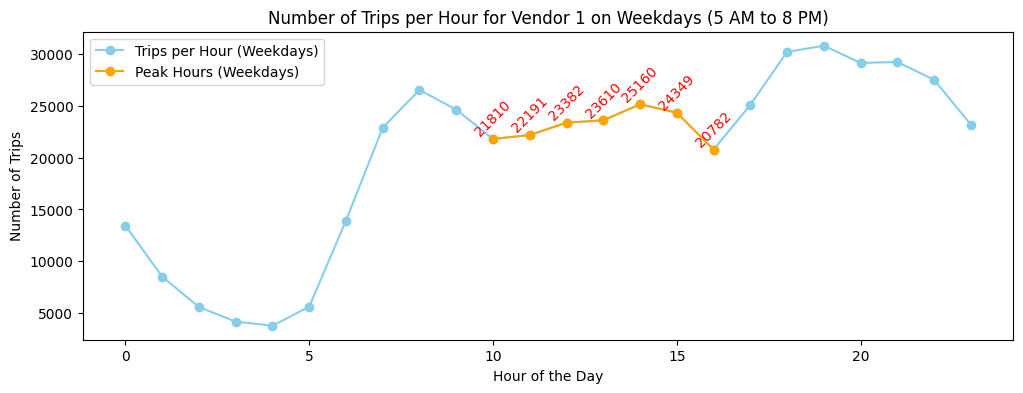

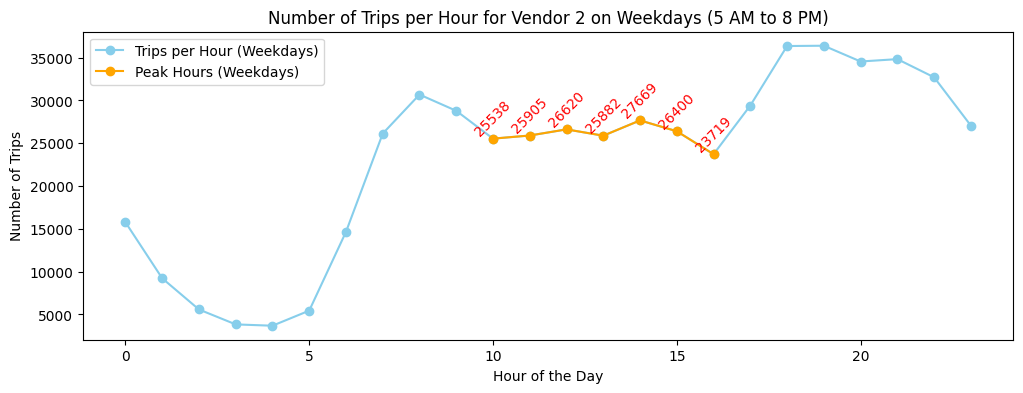

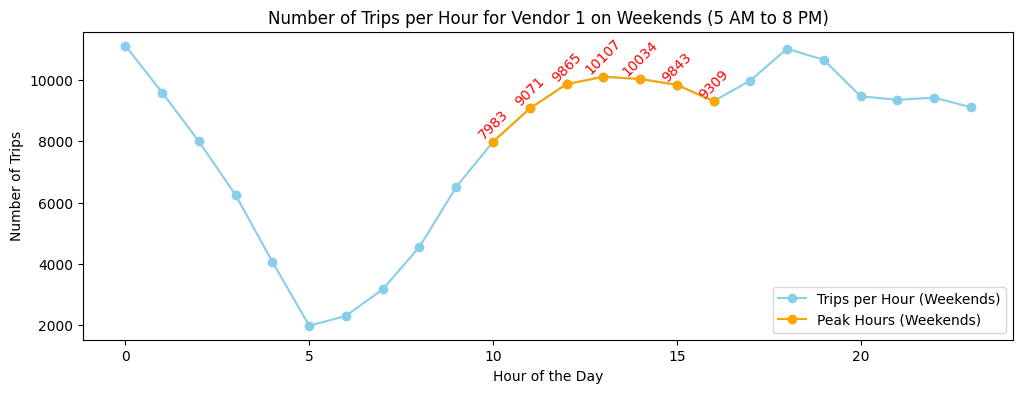

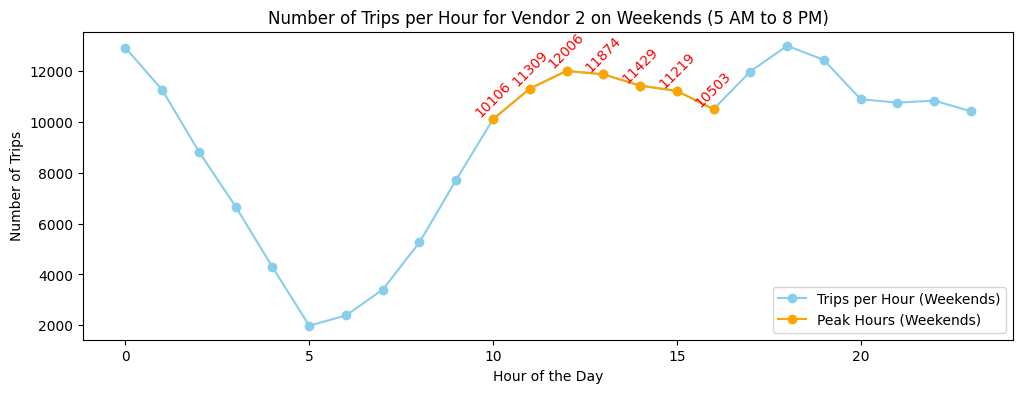

In [ ]:


# Step 1: Filter the Data for Weekdays (0-4) and Weekends (5-6)
weekday_data = df1[df1['Pickup Day'].isin([0, 1, 2, 3, 4])]
weekend_data = df1[df1['Pickup Day'].isin([5, 6])]

# Step 2: Group by Vendor ID and Hour for Weekdays
weekday_grouped_trips = weekday_data.groupby(['vendor_id', 'Pickup hours'])
weekday_trips_per_vendor_hour = weekday_grouped_trips.size().unstack()

# Step 3: Group by Vendor ID and Hour for Weekends
weekend_grouped_trips = weekend_data.groupby(['vendor_id', 'Pickup hours'])
weekend_trips_per_vendor_hour = weekend_grouped_trips.size().unstack()

# Step 4: Plot the Results for Weekdays using Line Plot with Specific Y-axis Range
for vendor_id in weekday_trips_per_vendor_hour.index:
    trips_per_hour = weekday_trips_per_vendor_hour.loc[vendor_id]
    
    # Increase figure size for each individual plot
    plt.figure(figsize=(12, 4))
    
    # Highlight the peak hours (10 AM to 5 PM) with a different line style
    highlight_mask = (trips_per_hour.index >= 10) & (trips_per_hour.index < 17)
    
    trips_per_hour.plot(marker='o', linestyle='-', color='skyblue', label='Trips per Hour (Weekdays)')
    
    # Highlight the peak hours with a different line style
    plt.plot(trips_per_hour.index[highlight_mask], trips_per_hour[highlight_mask], marker='o', linestyle='-', color='orange', label='Peak Hours (Weekdays)')
    
    # Annotate the peak hours with slightly rotated text for better visibility
    for hour in trips_per_hour.index[highlight_mask]:
        plt.text(hour, trips_per_hour[hour] + 1, str(trips_per_hour[hour]), ha='center', va='bottom', color='red', rotation=45)
    
      # Set y-axis range (adjust the values as needed)
    
    plt.title(f'Number of Trips per Hour for Vendor {vendor_id} on Weekdays (5 AM to 8 PM)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.legend()
    plt.show()

# Step 5: Plot the Results for Weekends using Line Plot with Specific Y-axis Range
for vendor_id in weekend_trips_per_vendor_hour.index:
    trips_per_hour = weekend_trips_per_vendor_hour.loc[vendor_id]
    
    # Increase figure size for each individual plot
    plt.figure(figsize=(12, 4))
    
    # Highlight the peak hours (10 AM to 5 PM) with a different line style
    highlight_mask = (trips_per_hour.index >= 10) & (trips_per_hour.index < 17)
    
    trips_per_hour.plot(marker='o', linestyle='-', color='skyblue', label='Trips per Hour (Weekends)')
    
    # Highlight the peak hours with a different line style
    plt.plot(trips_per_hour.index[highlight_mask], trips_per_hour[highlight_mask], marker='o', linestyle='-', color='orange', label='Peak Hours (Weekends)')
    
    # Annotate the peak hours with slightly rotated text for better visibility
    for hour in trips_per_hour.index[highlight_mask]:
        plt.text(hour, trips_per_hour[hour] + 1, str(trips_per_hour[hour]), ha='center', va='bottom', color='red', rotation=45)
    
      # Set y-axis range (adjust the values as needed)
    
    plt.title(f'Number of Trips per Hour for Vendor {vendor_id} on Weekends (5 AM to 8 PM)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.legend()
    plt.show()


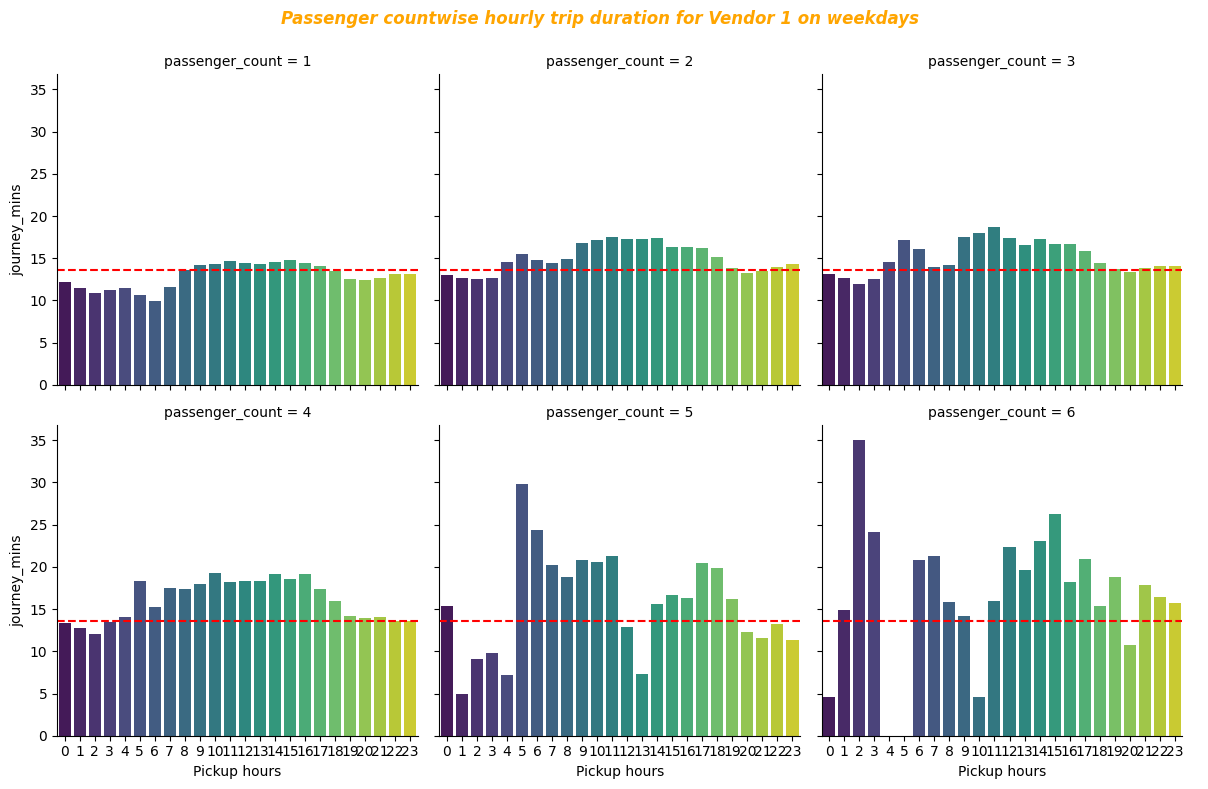

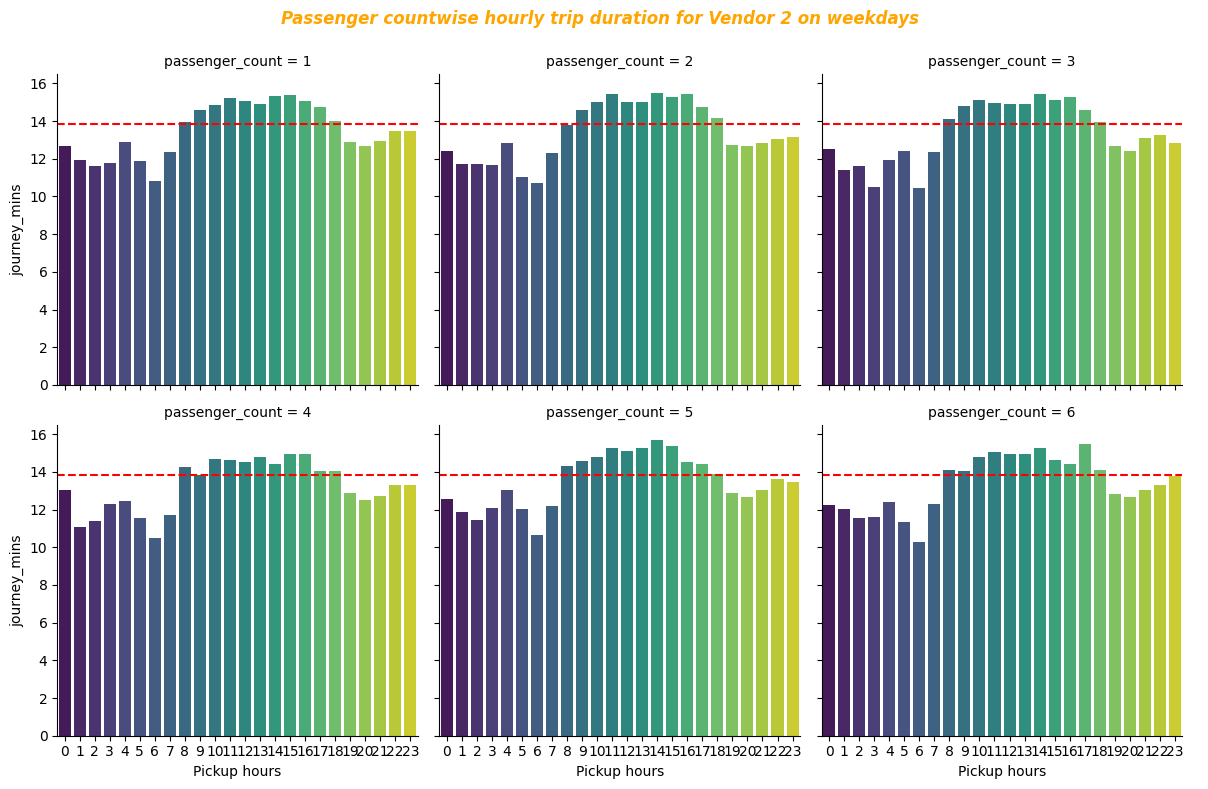

In [ ]:
# PASSENGER WISE HOURLY TRIP DURATION FOR EACH VENDOR ON WEEKDAYS
filter_weekday = weekday[weekday["passenger_count"].isin([1,2,3,4,5,6])]
weekday_group = filter_weekday.groupby("vendor_id")

for index, (vendor_id, grp) in enumerate(weekday_group):
    f = sns.FacetGrid(grp, col='passenger_count', col_wrap=3, height=4)
    f.map(sns.barplot, 'Pickup hours', 'journey_mins', palette='viridis', ci=None)
    
    for ax in f.axes.flat:
        ax.axhline(y=grp["journey_mins"].mean(), color='red', linestyle='--', label=f'Mean for Vendor {vendor_id}')
        

    # Adjust layout to accommodate title and legend
    f.fig.suptitle(f'Passenger countwise hourly trip duration for Vendor {vendor_id} on weekdays', color = "orange", style = "oblique", fontweight = "bold")
    f.fig.subplots_adjust(top=0.9)
    f.add_legend()

# Show the plot
plt.show()

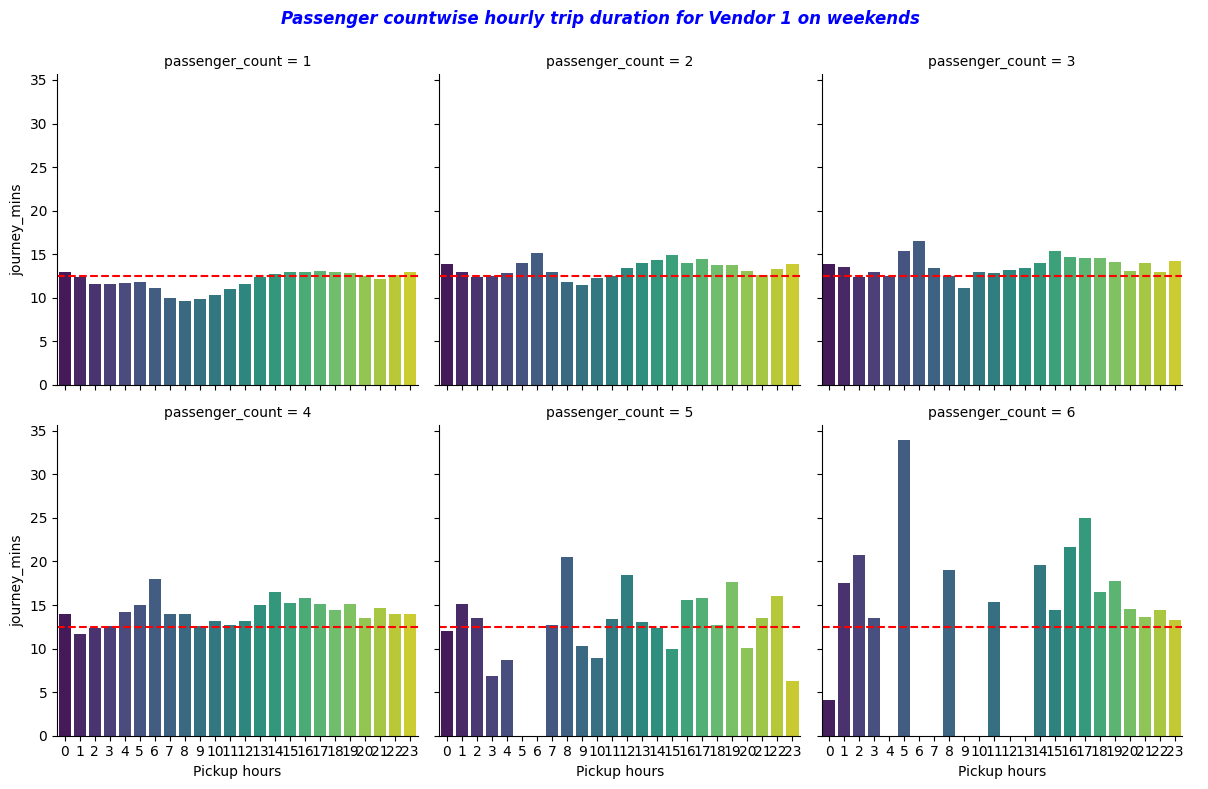

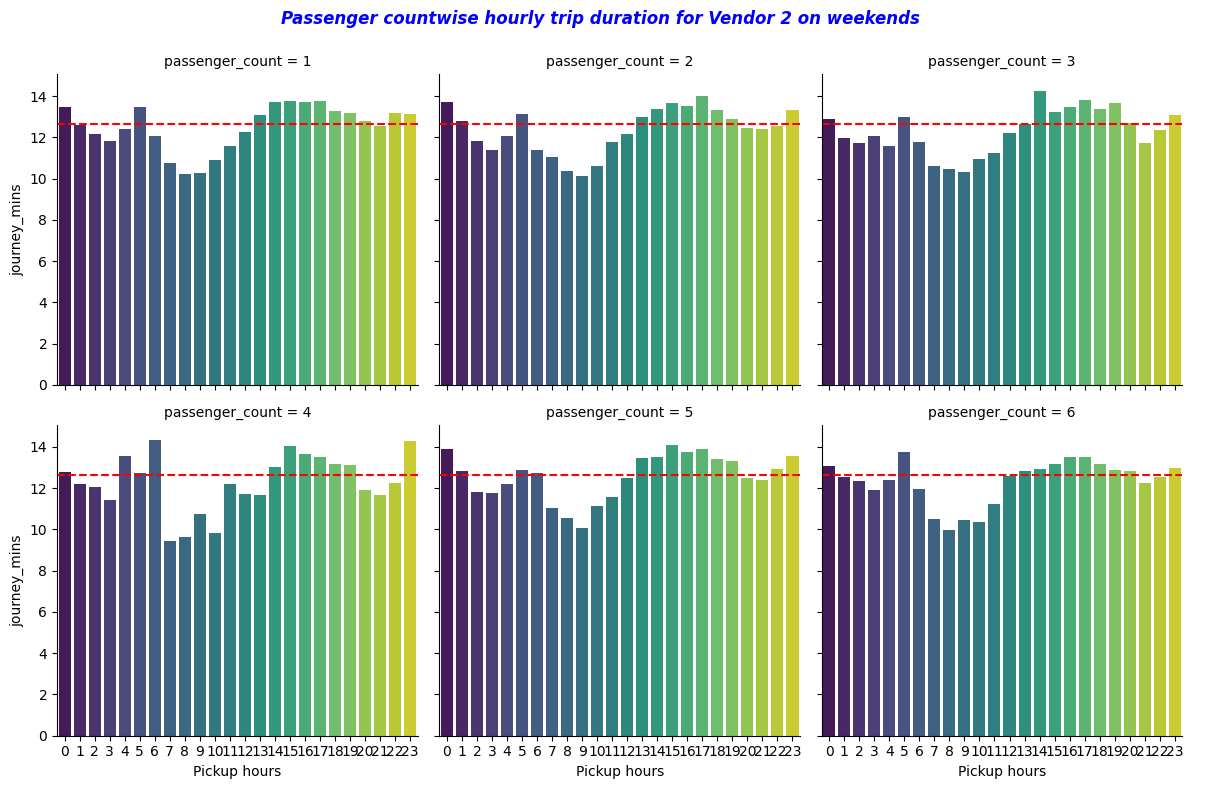

In [ ]:
# PASSENGER WISE HOURLY TRIP DURATION FOR EACH VENDOR ON WEEKENDS
filter_weekend = weekend[weekend["passenger_count"].isin([1,2,3,4,5,6])]
weekend_group = filter_weekend.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(weekend_group):
    f = sns.FacetGrid(group, col='passenger_count', col_wrap=3, height=4)
    f.map(sns.barplot, 'Pickup hours', 'journey_mins', palette='viridis', ci=None)
    
    for ax in f.axes.flat:
        ax.axhline(y=group["journey_mins"].mean(), color='red', linestyle='--', label=f'Mean for Vendor {vendor_id}')

    # Adjust layout to accommodate title and legend
    f.fig.suptitle(f'Passenger countwise hourly trip duration for Vendor {vendor_id} on weekends', color = "blue", style = "oblique", fontweight = "bold")
    f.fig.subplots_adjust(top=0.9)
    f.add_legend()

# Show the plot
plt.show()

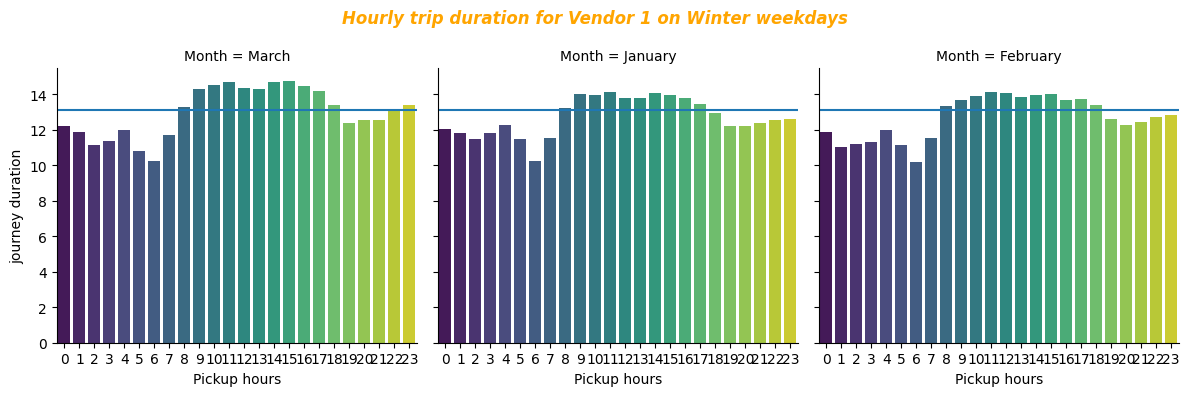

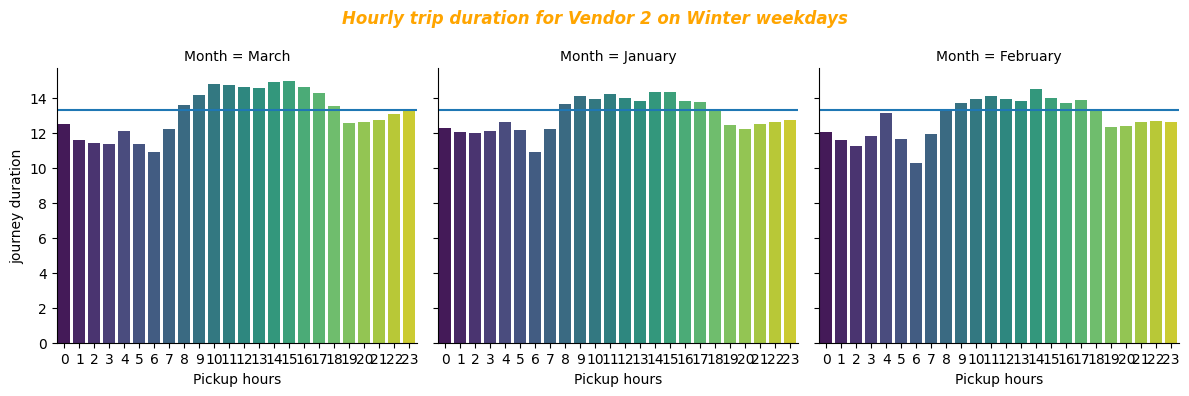

In [ ]:
# HOURLY TRIP DURATIONS FOR WINTER WEEKDAYS 
winter_months_weekday = weekday[weekday["Month"].isin([1,2,3])]
winter_months_weekday_group = winter_months_weekday.groupby("vendor_id")

month_name_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}

for index, (vendor_id, group) in enumerate(winter_months_weekday_group):
    
    group["Month"] = group["Month"].map(month_name_mapping)
    
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Winter weekdays", color = "orange", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

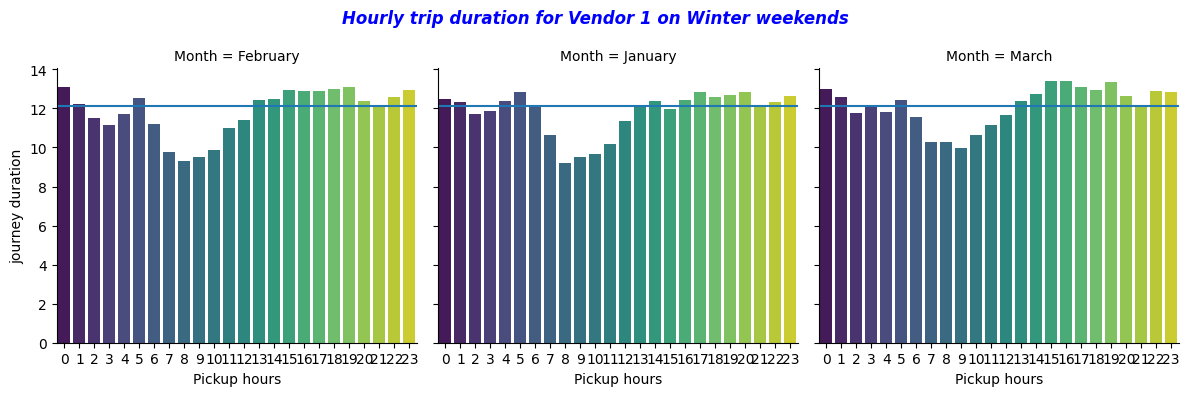

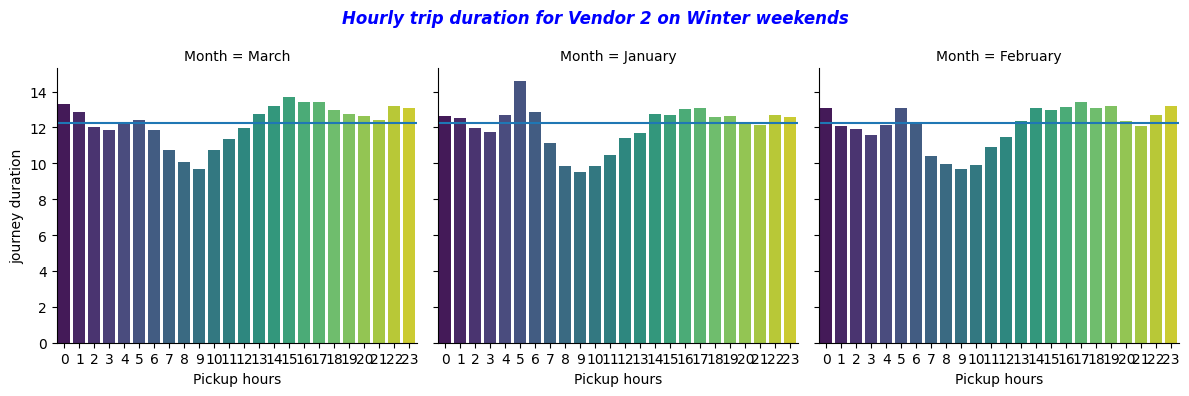

In [ ]:
# HOURLY TRIP DURATIONS FOR WINTER WEEKENDS
winter_months_weekend = weekend[weekend["Month"].isin([1,2,3])]
winter_months_weekend_group = winter_months_weekend.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(winter_months_weekend_group):
    
    group["Month"] = group["Month"].map(month_name_mapping)
    
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Winter weekends", color = "blue", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

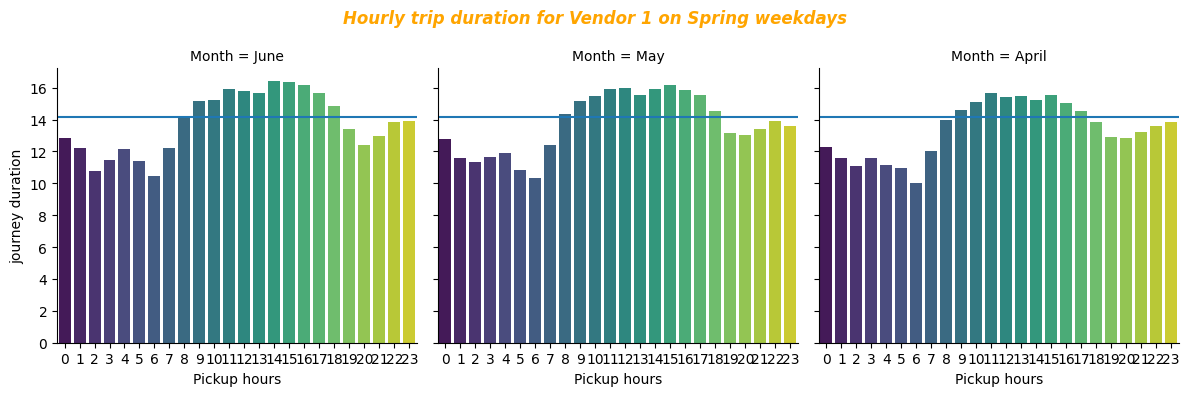

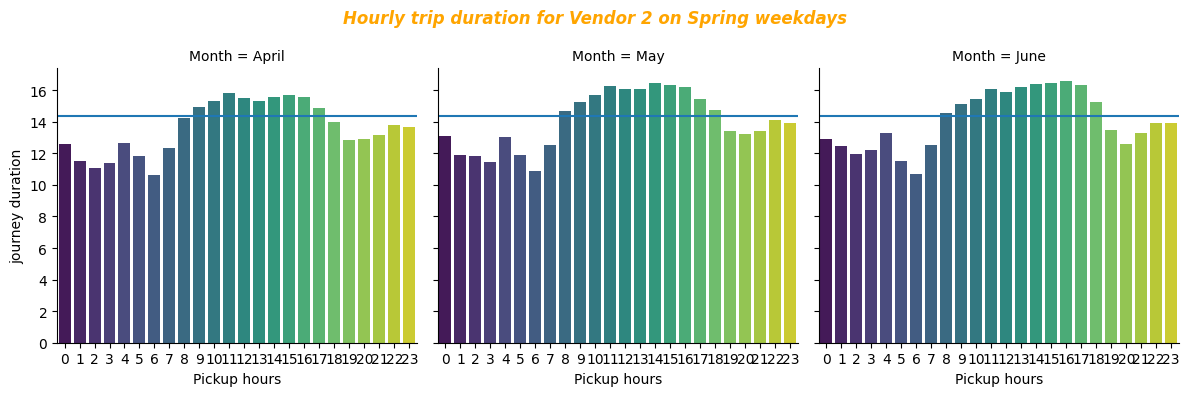

In [ ]:
# HOURLY TRIP DURATIONS FOR SPRING WEEKDAYS 
spring_months_weekday = weekday[weekday["Month"].isin([4,5,6])]
spring_months_weekday_group = spring_months_weekday.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(spring_months_weekday_group):
    
    group["Month"] = group["Month"].map(month_name_mapping)
    
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Spring weekdays", color = "orange", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

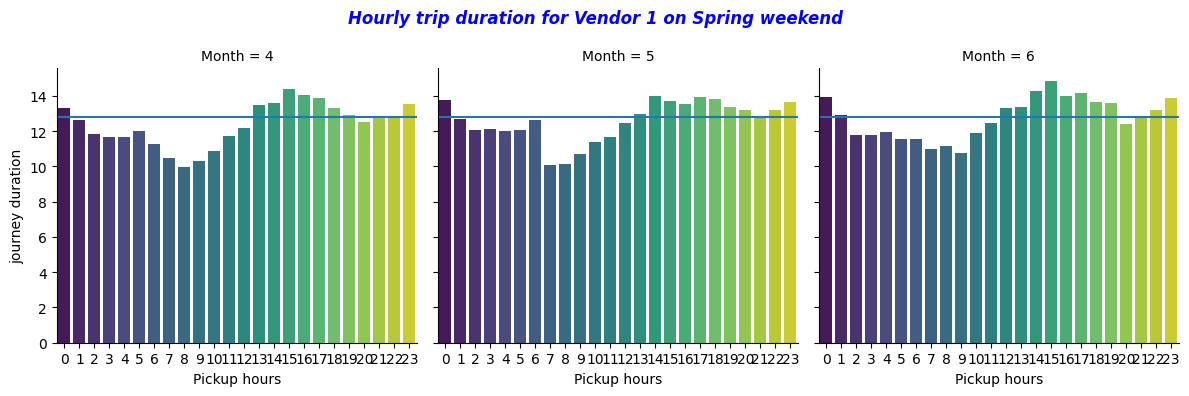

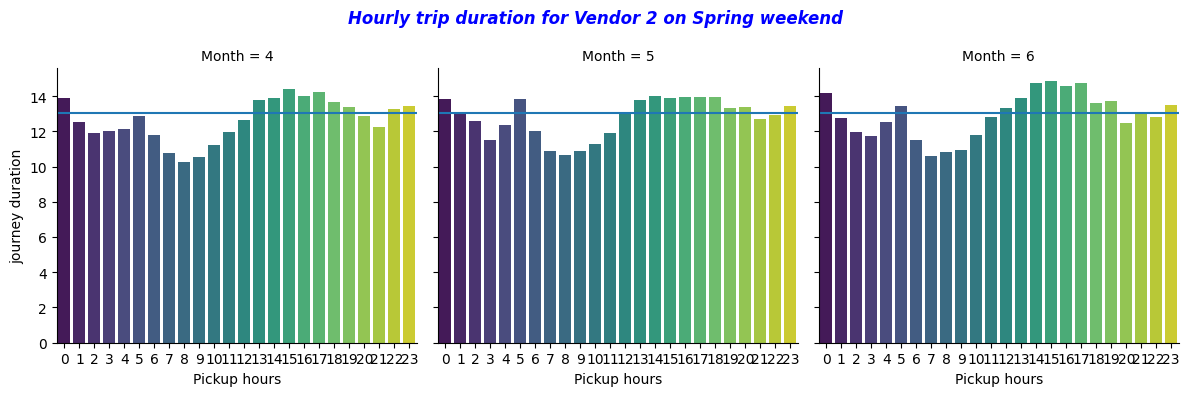

In [ ]:
# HOURLY TRIP DURATIONS FOR SPRING WEEKENDS 
spring_months_weekend = weekend[weekend["Month"].isin([4,5,6])]
spring_months_weekend_group = spring_months_weekend.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(spring_months_weekend_group):
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Spring weekend", color = "blue", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

In [16]:
data_train1 = df.copy()
m = data_train1["trip_duration"].mean()
s = np.std(data_train1["trip_duration"])
data_train1 = data_train1[(data_train1["trip_duration"] > m - 2*s) & (data_train1["trip_duration"] < m + 2*s)]
new_features(data_train1, 'pickup_datetime')
data_train1["Distance"] = data_train1.apply(distances, axis=1)
data_train1.drop(columns=["pickup_datetime","Month", "Pickup Day", "Pickup hours", "Pickup mins", "Distance"], inplace=True)
data_train1.drop(columns="dropoff_datetime", inplace=True)
data_train1["store_and_fwd_flag"] = data_train1["store_and_fwd_flag"].map({"N":0, "Y":1})
data_train1.set_index("id", inplace=True)
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456540 entries, id2875421 to id1209952
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype
---  ------              --------------    -----
 0   vendor_id           1456540 non-null  int64
 1   passenger_count     1456540 non-null  int64
 2   pickup_longitude    1456540 non-null  int64
 3   pickup_latitude     1456540 non-null  int64
 4   dropoff_longitude   1456540 non-null  int64
 5   dropoff_latitude    1456540 non-null  int64
 6   store_and_fwd_flag  1456540 non-null  int64
 7   trip_duration       1456540 non-null  int64
dtypes: int64(8)
memory usage: 100.0+ MB


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(data_train1)
scaled_train = pd.DataFrame(train_scaled, columns=scaler.feature_names_in_)
scaled_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1.0,0.111111,0.800000,0.352941,0.800000,0.727273,0.0,0.039790
1,0.0,0.111111,0.800000,0.352941,0.800000,0.727273,0.0,0.058019
2,1.0,0.111111,0.800000,0.352941,0.783333,0.727273,0.0,0.186065
3,1.0,0.111111,0.783333,0.352941,0.783333,0.727273,0.0,0.037511
4,1.0,0.111111,0.800000,0.352941,0.800000,0.727273,0.0,0.038037


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_train.drop(columns="trip_duration"), scaled_train["trip_duration"], test_size=0.2, random_state=42)

In [15]:
main_test = df_test.copy()
new_features(main_test, 'pickup_datetime')
main_test["Distance"] = main_test.apply(distances, axis=1)
main_test.drop(columns=["pickup_datetime", "store_and_fwd_flag"], inplace=True)
main_test.set_index("id", inplace=True)
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625134 entries, id3004672 to id0621643
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vendor_id          625134 non-null  int64  
 1   passenger_count    625134 non-null  int64  
 2   pickup_longitude   625134 non-null  int64  
 3   pickup_latitude    625134 non-null  int64  
 4   dropoff_longitude  625134 non-null  int64  
 5   dropoff_latitude   625134 non-null  int64  
 6   Month              625134 non-null  int32  
 7   Pickup Day         625134 non-null  int32  
 8   Pickup hours       625134 non-null  int32  
 9   Pickup mins        625134 non-null  int32  
 10  Distance           625134 non-null  float64
dtypes: float64(1), int32(4), int64(6)
memory usage: 47.7+ MB


In [16]:
test_scaled = scaler.fit_transform(main_test)
scaled_test = pd.DataFrame(test_scaled, columns=scaler.feature_names_in_)
scaled_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Month,Pickup Day,Pickup hours,Pickup mins,Distance
0,0.0,0.111111,0.923077,0.6,0.888889,0.333333,1.0,0.5,1.0,1.0,0.0
1,0.0,0.111111,0.923077,0.6,0.888889,0.333333,1.0,0.5,1.0,1.0,0.0
2,0.0,0.111111,0.923077,0.6,0.888889,0.333333,1.0,0.5,1.0,1.0,0.0
3,1.0,0.111111,0.923077,0.6,0.888889,0.333333,1.0,0.5,1.0,1.0,0.0
4,0.0,0.111111,0.923077,0.6,0.888889,0.333333,1.0,0.5,1.0,1.0,0.0


In [26]:
df_test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [20]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, root_mean_squared_error, root_mean_squared_log_error


xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)



# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'max_samples': [0.5, 0.7, 0.9, None]}

# grid = GridSearchCV(rfr, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, param_grid=params)
# grid.fit(X_train, y_train)

# best_params = grid.best_params_
# best_score = grid.best_score_
# best_estimators = grid.best_estimator_
# features = best_estimators.feature_importances_



In [21]:
root_mean_squared_log_error(y_test, y_pred)

0.0503628885947984